<a href="https://colab.research.google.com/github/axeltanjung/learn_rag_lllm/blob/main/End_to_End_Multi_AI_Agents_RAG_With_LangGraph_AstraDB_And_Llama_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully 

In [ ]:
import cassio

## Connection of the AstraDB
ASTRA_DB_APPLICATION_TOKEN="AstraCS:BuMhUkmIExEnyHZxlKEZJKml:aa4cf82a3cf2ad418b6e12ed8b5381582d005fe31fd87de9740ee0684eed1a5e"
ASTRA_DB_ID="42448510-b8d4-4ffb-866f-66fe45b4840a"

cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install -U tiktoken langchain-groq langchainhub langchain langgraph langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 17.3 MB/s eta 0:00:00


In [ ]:
### Build Index
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

# Docs to index
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack/"
]

## Load
docs=[WebBaseLoader(url).load() for url in urls]
doc_list = [item for sublist in docs for item in sublist]
print(doc_list)
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=0)
docs_split = text_splitter.split_documents(doc_list)

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Auton

In [ ]:
doc_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Auton

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,
                               table_name="qa_mini_demo",
                               session = None,
                               keyspace = None)

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines." % len(docs_split))
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 52 headlines.


In [ ]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("What is agent")

[Document(metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log"}, page_content='Planning is essentially in order to optimize believability at the moment vs in time.\nPrompt template: {Intro of an agent X}. Here is X\'s plan today in broad strokes: 1)\nRelationships between agents and observations of one agent by another are all taken into consideration for planning and reacting.\nEnvironment info

In [ ]:
## Langgraph Application
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Data model
class RouteQuery(BaseModel):
  """Route a user query to the most relevant datasource."""

  datasource: Literal["vectorstore", "wiki_search"] = Field(
      ...,
      description="Given a user question choose to route it to wikipedia or a vectorestore.",
  )

In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key = userdata.get('GROQ_API_KEY')

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Llama-3.1-70b-Versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ab7268ed810>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ab7268ee4d0>, model_name='Llama-3.1-70b-Versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
structured_llm_router=llm.with_structured_output(RouteQuery)

In [ ]:
# Prompt
system = """You are an expert at routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use wiki-search."""

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | structured_llm_router

In [ ]:
print(
    question_router.invoke(
        {
            "question": "What is agent?"
        }
    ))

datasource='vectorstore'


In [ ]:
print(
    question_router.invoke(
        {
            "question": "Who is Ivar Jenner?"
        }
    ))

datasource='wiki_search'


In [ ]:
!pip install langchain_community
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=121a048d8a96384f45577efcdb40cc92e72c4407c01f5f553097a6401b598ada
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun
api_wrapper=WikipediaAPIWrapper(top_k_results=1, doc_content_chart_max = 200)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki.run("Tell me about Prabowo Subianto")

'Page: Joko Widodo\nSummary: Joko Widodo (Indonesian: [dʒɔkɔ widɔdɔ]; born Mulyono; 21 June 1961), popularly known as Jokowi, is an Indonesian politician and businessman who is the seventh president of Indonesia. Previously a member of the Indonesian Democratic Party of Struggle (PDI-P), he was the country\'s first president to not emerge from the country\'s political or military elite. He previously served as governor of Jakarta from 2012 to 2014 and mayor of Surakarta from 2005 to 2012. He is due to step down on 20 October 2024, when he will be replaced by Prabowo Subianto.\nJokowi was born and raised in a riverside slum in Surakarta. He graduated from Gadjah Mada University in 1985, and married his wife, Iriana, a year later. He worked as a carpenter and a furniture exporter before being elected mayor of Surakarta in 2005. He achieved national prominence as mayor and was elected governor of Jakarta in 2012, with Basuki Tjahaja Purnama as vice governor. As governor, he reinvigorated 

In [ ]:
## AIGents Application using Langgraph
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """
  Represent the state of our graph.

  Attributes:
    question: question
    generation: LLM generation
    documents: list of documents
  """

  question: str = ""
  generation: str = ""
  documents: List[str] = []

In [ ]:
from langchain.schema import document

def retrieve(state):
  """
  Retrieve documents

  Args:
    state (dict): The current graph state

  Returns:
    state (dict): New key added to state, documents, that contains retrieved documents
  """
  print("---Retrieve---")
  question = state["question"]
  questions = [question]

  ## Retrieval
  documents = retriever.invoke(questions)
  return {"documents":documents, "question": question}


In [ ]:
def wiki_search(state):
  """
  Wiki search based on the re-phrased question.

  Args:
    state (dict): The current graph state

  Returns:
    state (dict): Updates documents key with appended web resuts
  """
  print("---wikipedia---")
  print("---HELLO---")
  questions=state["question"]
  print(questions)

  ## Wiki search
  docs = wiki.invoke({"query": question})
  wiki_results = docs
  wiki_results = Document(page_content=wiki_results)

  return {"documents":wiki_results, "question": question}


In [ ]:
### EDGES ###

def route_question(state):
  """
  Route question to wiki search for RAG.

  Args:
    state (dict): The current graph state

  Returns:
    str : Next code to call
  """

  print("""---ROUTE QUESTION---""")
  question = state["question"]
  source = question_router.invoke({"question": question})

  if source.datasource == "vectorstore":
    print("---ROUTE QUESTION TO RAG---")
    return "vectorstore"
  elif source.datasource == "wiki_search":
    print("---ROUTE QUESTION TO WIKI SEARCH---")
    return "wiki_search"

In [ ]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)

## Define the nodes
workflow.add_node("wiki_search", wiki_search) # web search
workflow.add_node("retrieve", retrieve) # retrieve

## Build the Graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "wiki_search":"wiki_search",
        "vectorstore":"retrieve"
    },
)

workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)

## Compile
app = workflow.compile()

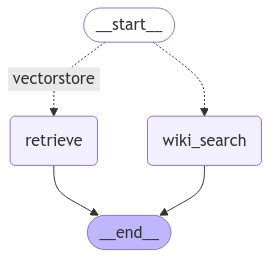

In [ ]:
from IPython.display import Image, display

try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  # This requires some extra dependencies and is optional
  pass